<a href="https://colab.research.google.com/github/Abhishek-Shubham001/Online-Retail-Customer-Segmentation/blob/main/Online_Retail_Customer_Segmentation_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Identification of major customer segments on a transactional dataset. </u></b>



## <b> Problem Description </b>

### In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

## <b> Data Description </b>

### <b>Attribute Information: </b>

- **InvoiceNo**: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
- **StockCode:** Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
- **Description:** Product (item) name. Nominal.
- **Quantity:** The quantities of each product (item) per transaction. Numeric.
- **InvoiceDate:** Invice Date and time. Numeric, the day and time when each transaction was generated.
- **UnitPrice**: Unit price. Numeric, Product price per unit in sterling.
- **CustomerID:** Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
- **Country:** Country name. Nominal, the name of the country where each customer resides.

## **Data Preperation**

In [1]:
#Importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Connecting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Importing the dataset
retail_df= pd.read_excel('/content/drive/MyDrive/Almabetter/Capstone Projects/Online Retail Customer Segmentation - Abhishek Shubham/Online Retail.xlsx') 

In [4]:
#Checking the top 5 rows
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
#Checking the bottom 5 rows
retail_df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [6]:
#Basic info of the dataset
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [7]:
# Shape of teh dataset
retail_df.shape

(541909, 8)

In [8]:
#Getting all the null values and their percentage
null_values= retail_df.isnull().sum().sort_values(ascending= False)
total= len(retail_df)
percentage_null_values= (null_values/total )* 100
null_df= pd.concat([null_values, percentage_null_values], axis= 1, keys= ['Total Null Values', 'Percentage %'])
null_df

,Total Null Values,Percentage %
CustomerID,135080,24.926694
Description,1454,0.268311
InvoiceNo,0,0.000000
StockCode,0,0.000000
Quantity,0,0.000000
InvoiceDate,0,0.000000
UnitPrice,0,0.000000
Country,0,0.000000


- Only 2 columns has missing values i.e. 'CustomerID' and 'Description'.
- Around 25% missing values are there in **CustomerID** and 0.26% null values present in **Description** column.
- These are such features that we cannot impute with other values because customer IDs are unique for each customer, so we have to drop these instances.

In [9]:
retail_df.shape

(541909, 8)

In [10]:
#Dropping rows with null values
retail_df.dropna(inplace= True)

In [11]:
retail_df.shape

(406829, 8)

In [12]:
#Number of duplicate values
print(len(retail_df[retail_df.duplicated()]))

5225


In [13]:
# Dropping duplicate rows
retail_df.drop_duplicates(inplace=True)

In [14]:
#New shape of DataFrame
retail_df.shape

(401604, 8)

Now we are left with 401604 instances/rows in our dataset after dropping Null and duplicate values.

In [15]:
#Converting 
retail_df['StockCode'].value_counts()

85123A    2065
22423     1894
85099B    1659
47566     1409
84879     1405
          ... 
90104        1
90135        1
90027D       1
90027A       1
84746        1
Name: StockCode, Length: 3684, dtype: int64

In [16]:
#
retail_df['InvoiceNo'].value_counts()

576339     542
579196     533
580727     529
578270     442
573576     435
          ... 
C560912      1
560913       1
560917       1
572879       1
553049       1
Name: InvoiceNo, Length: 22190, dtype: int64

In [17]:
#Descriptive statistics
retail_df.describe()

,Quantity,UnitPrice,CustomerID
count,401604.000000,401604.000000,401604.000000
mean,12.183273,3.474064,15281.160818
std,250.283037,69.764035,1714.006089
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13939.000000
50%,5.000000,1.950000,15145.000000
75%,12.000000,3.750000,16784.000000
max,80995.000000,38970.000000,18287.000000


From the above descriptive statistics we can say that customers usually buy **5** quantity of products per order. Also the median price that the company get paid by the customer for one unit is about **1.95.**

##**Feature Engineering**

In [18]:
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [19]:
#Creating a new feature Total amount
retail_df['total_amount']= retail_df['Quantity']* retail_df['UnitPrice']

In [20]:
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [21]:
#Extracting year, month, day and hours data from InvoiceDate column and creating a seperate column for these features.

retail_df['Invoice_year']= retail_df['InvoiceDate'].apply(lambda x: x.year )
retail_df['Invoice_month']= retail_df['InvoiceDate'].apply(lambda x: x.strftime('%B'))
retail_df['Invoice_day']= retail_df['InvoiceDate'].apply(lambda x: x.strftime('%A'))
retail_df['Invoice_hour']= retail_df['InvoiceDate'].apply(lambda x: x.hour)

In [22]:
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_amount,Invoice_year,Invoice_month,Invoice_day,Invoice_hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,December,Wednesday,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,December,Wednesday,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010,December,Wednesday,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,December,Wednesday,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,December,Wednesday,8


In feature engineering we have created total 5 new featues i.e. **total_amount, Invoice_year, Invoice_month, Invoice_day, Invoice_hour** from the existing features.

##**Exploratory Data Analysis**

###**Univariate Analysis**

In [23]:
Numerical_features = list(retail_df.select_dtypes(['int64', 'float64']))
Numerical_features


['Quantity',
 'UnitPrice',
 'CustomerID',
 'total_amount',
 'Invoice_year',
 'Invoice_hour']

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


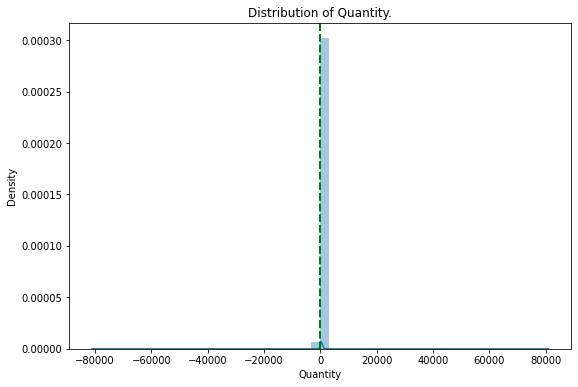

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


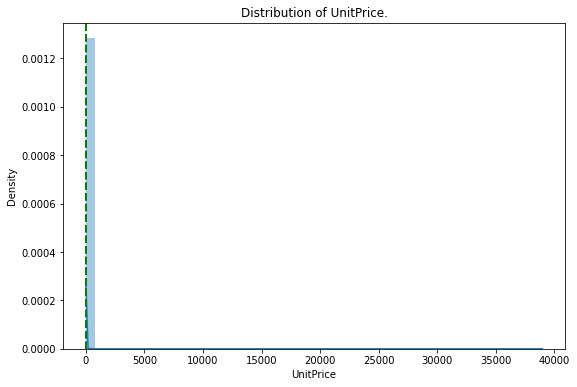

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


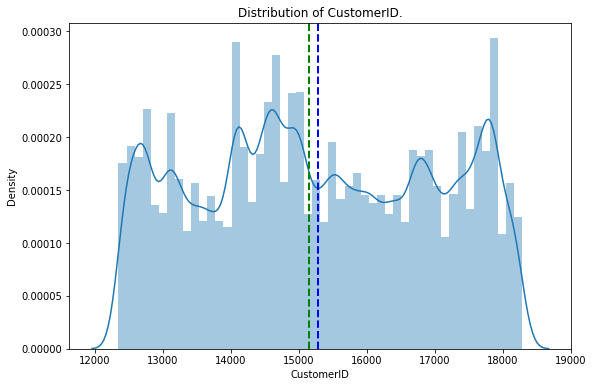

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


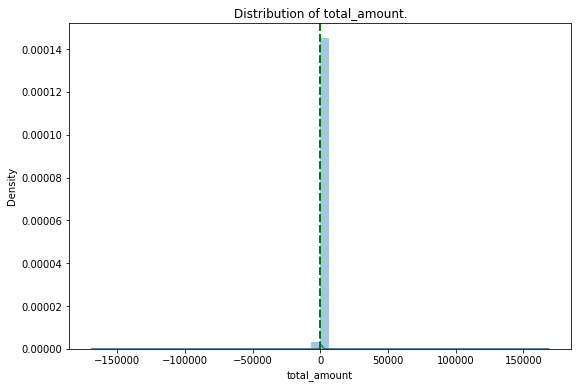

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


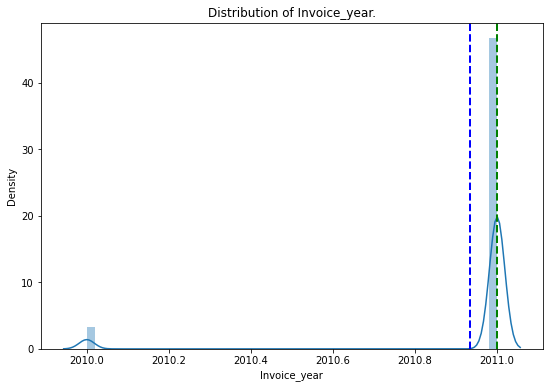

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


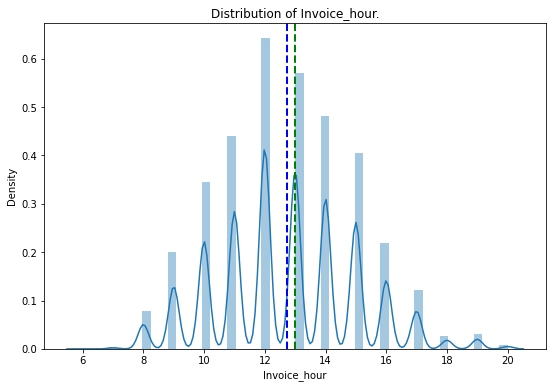

In [24]:
for col in Numerical_features:
  fig=plt.figure(figsize=(9,6))
  ax=fig.gca()
  feature = (retail_df[col])
  sns.distplot(retail_df[col],ax = ax)
  ax.axvline(feature.mean(),color='blue', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(),color='green', linestyle='dashed', linewidth=2)
  ax.set_title(f'Distribution of {col}.')
  plt.show()

In [25]:
# No of cancelled order
retail_df[retail_df['total_amount']<=0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_amount,Invoice_year,Invoice_month,Invoice_day,Invoice_hour
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,-27.50,2010,December,Wednesday,9
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,-4.65,2010,December,Wednesday,9
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,-19.80,2010,December,Wednesday,10
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,-6.96,2010,December,Wednesday,10
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,-6.96,2010,December,Wednesday,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom,-9.13,2011,December,Friday,9
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom,-224.69,2011,December,Friday,10
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom,-54.75,2011,December,Friday,11
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom,-1.25,2011,December,Friday,11


In [90]:
def order_status(data):
  '''
  This function will identify the executed and cancelled orders made by customers,
  those whom order is successfully executed, tagged as Successfull Orders
  those who cancel their orders, tag them with Cancelled Orders
  '''
  if(data < 0):
    return 'Cancelled Order'
  else:
    return 'Successful Order'
  return data

In [96]:
retail_dup_data = retail_df.copy()

In [97]:
# applying business insight function on Total_Amount
retail_dup_data['Order_Status'] = retail_dup_data['total_amount'].apply(order_status)

In [98]:
retail_dup_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_amount,Invoice_year,Invoice_month,Invoice_day,Invoice_hour,Order_Status
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,December,Wednesday,8,Successful Order
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,December,Wednesday,8,Successful Order
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010,December,Wednesday,8,Successful Order
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,December,Wednesday,8,Successful Order
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,December,Wednesday,8,Successful Order


In [103]:
Order_Status= retail_dup_data['Order_Status'].value_counts().reset_index()
Order_Status.rename(columns= {'index': 'Order_Status', 'Order_Status': 'Frequency'}, inplace= True)
Order_Status

,Order_Status,Frequency
0,Successful Order,392732
1,Cancelled Order,8872


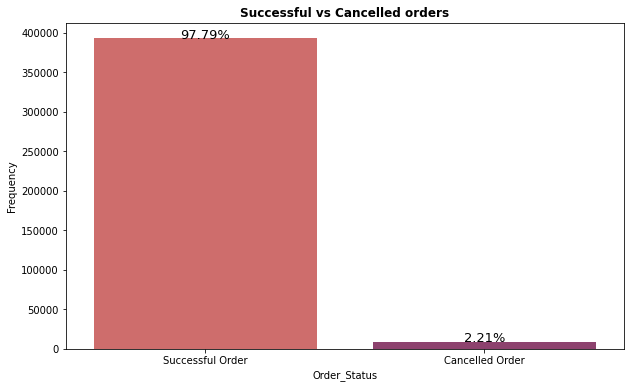

In [116]:
#Visualizing Status of the orders placed by customer
fig, ax = plt.subplots(figsize = (10,6))
splot= sns.barplot(x= 'Order_Status', y= 'Frequency', data= Order_Status, palette= 'flare')
ax.set_title('Successful vs Cancelled orders', weight= 'bold')

for p in splot.patches:                               
    height = p.get_height()
    splot.text(p.get_x()+p.get_width()/2, height+100, '{:1.2f}''%'.format(height/retail_dup_data.shape[0]*100),ha = "center", SIZE = 13)

In [27]:
# Count of unique values in hour column
retail_df.Invoice_hour.value_counts()

12    72213
13    64051
14    54194
11    49525
15    45641
10    38725
16    24618
9     22446
17    13604
8      8789
19     3423
18     3104
20      847
7       383
6        41
Name: Invoice_hour, dtype: int64

Text(0.5, 1.0, 'NO of orders placed per hour')

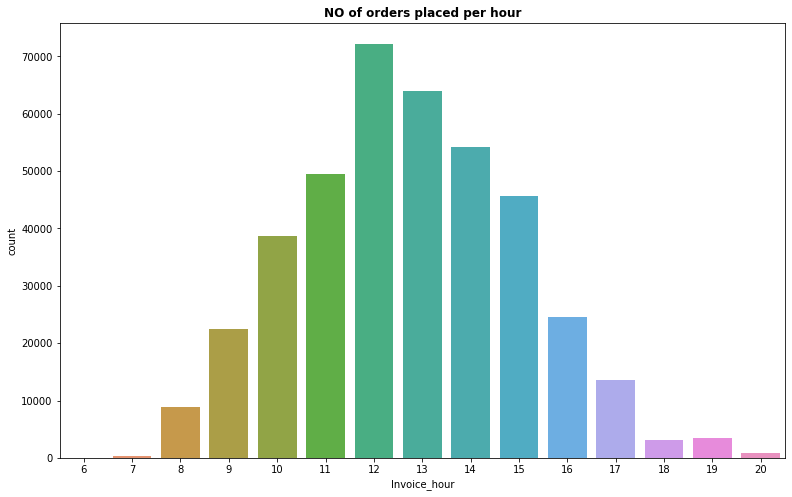

In [28]:
#Visualizing Invoice_hour column
plt.figure(figsize= (13, 8))
sns.countplot(x= 'Invoice_hour', data= retail_df)
plt.title('NO of orders placed per hour', weight= 'bold')

In [31]:
top_days= retail_df.Invoice_day.value_counts().reset_index()
top_days.rename(columns= {'index': 'Day', 'Invoice_day':'No_of_orders'}, inplace= True)
top_days['Orders_%']= top_days['No_of_orders']/ retail_df['Invoice_day'].count()*100
top_days

,Day,No_of_orders,Orders_%
0,Thursday,81575,20.312298
1,Wednesday,69753,17.368602
2,Tuesday,67376,16.776725
3,Monday,65715,16.363134
4,Sunday,61673,15.356670
5,Friday,55512,13.822571


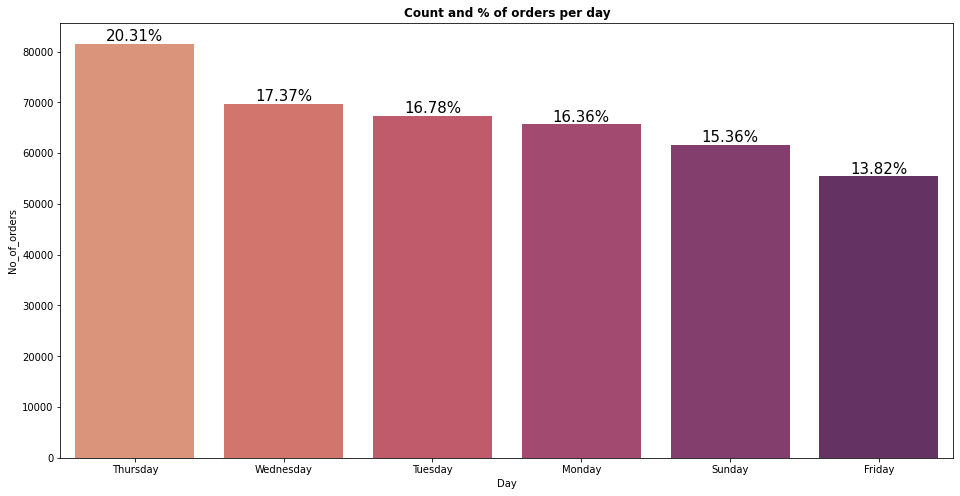

In [74]:
#Visualizing the count and % of Orders per day
fig, ax = plt.subplots(figsize = (16,8))
splot= sns.barplot(x= 'Day',y='No_of_orders', data= top_days, palette= 'flare')
ax.set_title('Count and % of orders per day', weight= 'bold')
for p in splot.patches:                              
    height = p.get_height()
    splot.text(p.get_x()+p.get_width()/2, height+500, '{:1.2f}''%'.format(height/retail_df.shape[0]*100),ha = "center", SIZE = 15)

In [33]:
#Count and percentage of orders made per month
top_months= retail_df.Invoice_month.value_counts().reset_index()
top_months.rename(columns= {'index': 'Month', 'Invoice_month': 'Count_of_orders'}, inplace= True)
top_months['%_of_orders']= top_months['Count_of_orders']/ retail_df['Invoice_month'].count()*100
top_months.head()

,Month,Count_of_orders,%_of_orders
0,November,64232,15.993865
1,October,49928,12.432147
2,December,43736,10.890330
3,September,40459,10.074352
4,May,28661,7.136632


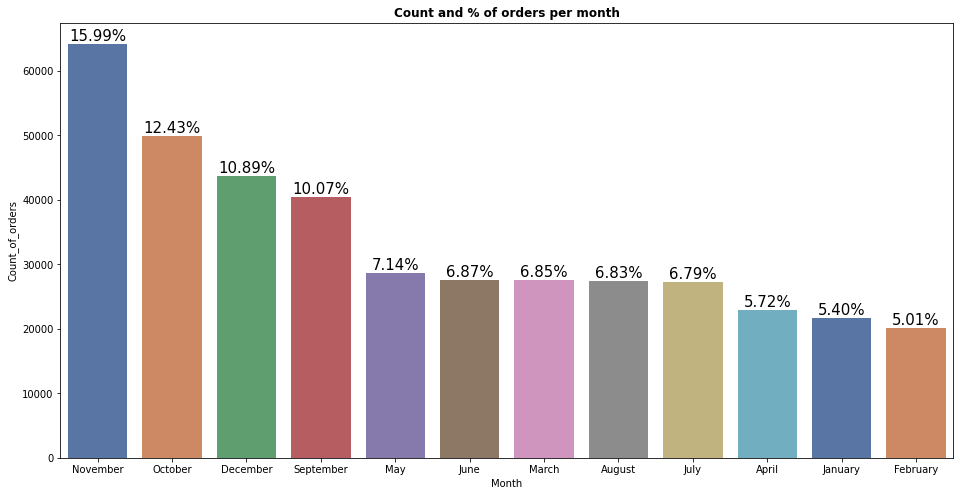

In [34]:
#Visualizing the count and % of Orders per month
fig, ax = plt.subplots(figsize = (16,8))
# plt.figure(figsize= (13, 8)) 
splot= sns.barplot(x= 'Month',y='Count_of_orders', data= top_months, palette= 'deep')
ax.set_title('Count and % of orders per month', weight= 'bold')
for p in splot.patches:                              
    height = p.get_height()
    splot.text(p.get_x()+p.get_width()/2, height+500, '{:1.2f}''%'.format(height/retail_df.shape[0]*100),ha = "center", SIZE = 15)

In [35]:
#Getting the count and percentage of top countries from which maximum orders were placed
top_countries = pd.DataFrame(retail_df['Country'].value_counts().sort_values(ascending = False).reset_index())
top_countries['Country %']= top_countries['Country']*100/retail_df['Country'].count()
top_countries.rename(columns = {'index':'Country','Country':'Total Counts'},inplace = True)
top_countries.head(5)

,Country,Total Counts,Country %
0,United Kingdom,356728,88.825809
1,Germany,9480,2.360534
2,France,8475,2.110288
3,EIRE,7475,1.861286
4,Spain,2528,0.629476


In [36]:
retail_df['Country'].count()

401604

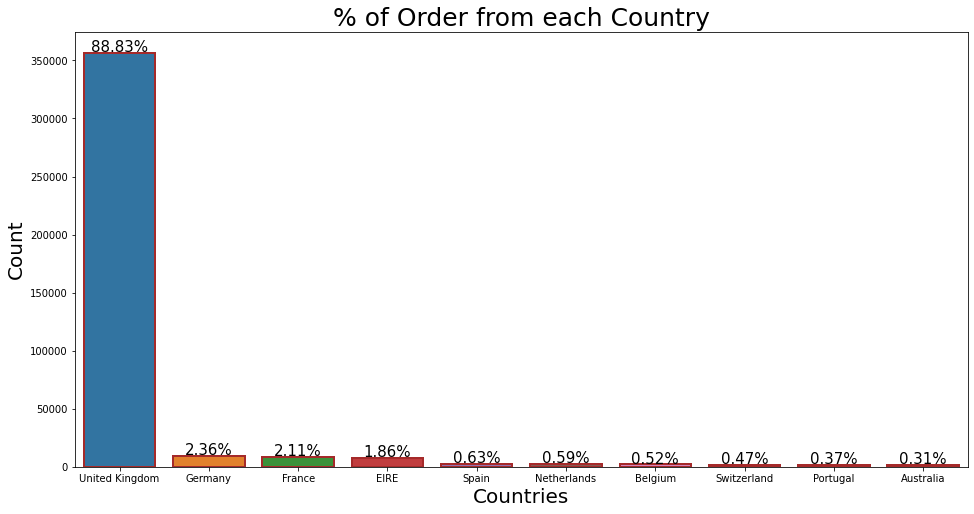

In [37]:
#Visualizing percentage of orders from top 10 countries (edgecolor = 'brown', lw = 2)
fig, ax = plt.subplots(figsize = (16,8))
splot = sns.barplot(x='Country',y='Total Counts',data = top_countries[:10], edgecolor = 'brown', lw = 2)
plt.title('% of Order from each Country', SIZE = 25)
plt.xlabel('Countries', SIZE = 20)
plt.ylabel('Count', SIZE = 20)
for p in splot.patches:                              
    height = p.get_height()
    splot.text(p.get_x()+p.get_width()/2, height+1000, '{:1.2f}''%'.format(height/retail_df.shape[0]*100),ha = "center", SIZE = 15)

Text(0.5, 1.0, 'Top 5 countries')

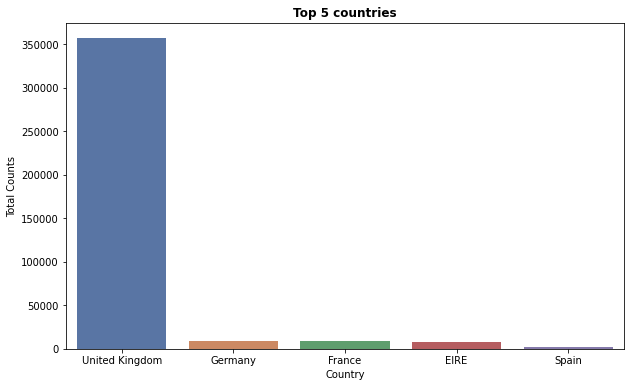

In [38]:
#Top 5 countries
plt.figure(figsize= (10,6))
sns.barplot(x= 'Country', y= 'Total Counts', data= top_countries[:5], palette= 'deep')
plt.title('Top 5 countries', weight= 'bold')

In [43]:
#Most popular products with maximum orders
Top_5_products= retail_df.groupby('Description').count()['CustomerID'].reset_index().sort_values(by= 'CustomerID', ascending= False)
Top_5_products.rename(columns= {'Description':'Products', 'CustomerID': 'frequency'}, inplace= True)
Top_5_products.head()

,Products,frequency
3716,WHITE HANGING HEART T-LIGHT HOLDER,2058
2780,REGENCY CAKESTAND 3 TIER,1894
1771,JUMBO BAG RED RETROSPOT,1659
2355,PARTY BUNTING,1409
217,ASSORTED COLOUR BIRD ORNAMENT,1405


Text(0.5, 1.0, 'Top 5 products')

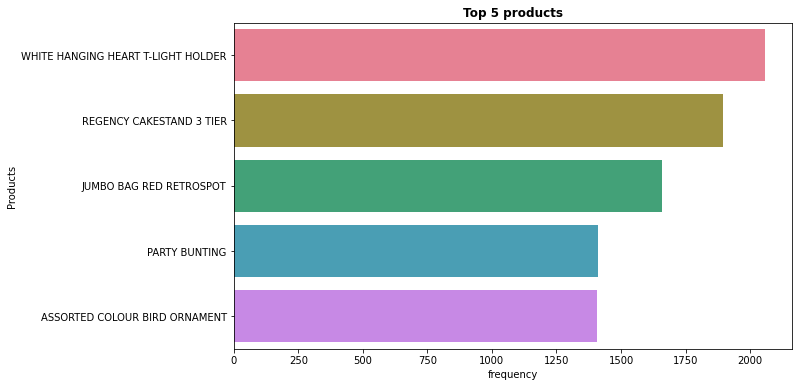

In [44]:
#Visualizing top 5 products
plt.figure(figsize= (10, 6))
sns.barplot(y= 'Products', x= 'frequency', data= Top_5_products.head(), palette= 'husl')
plt.title('Top 5 products', weight= 'bold')

In [45]:
#Visualizing top customers
Top_5_customers= retail_df['CustomerID'].value_counts().reset_index()
Top_5_customers.rename(columns= {'index':'CustomerID', 'CustomerID': 'Count'}, inplace= True)
Top_5_customers.head(5)

,CustomerID,Count
0,17841.0,7812
1,14911.0,5898
2,14096.0,5128
3,12748.0,4459
4,14606.0,2759


Text(0.5, 1.0, 'Top 5 customers')

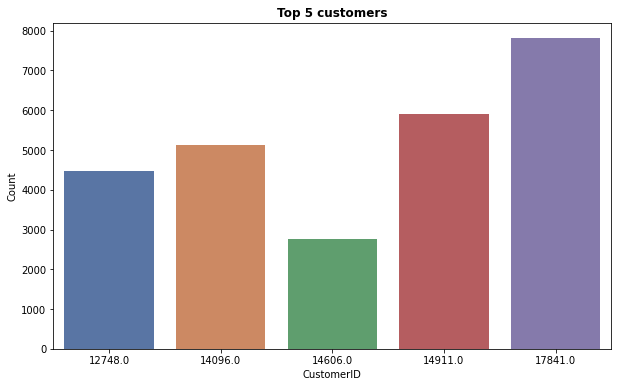

In [71]:
plt.figure(figsize= (10, 6))
sns.barplot( x= 'CustomerID',y= 'Count', data= Top_5_customers.head(5), palette= 'deep')
plt.title('Top 5 customers', weight= 'bold')

In [47]:
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_amount,Invoice_year,Invoice_month,Invoice_day,Invoice_hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,December,Wednesday,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,December,Wednesday,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010,December,Wednesday,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,December,Wednesday,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,December,Wednesday,8


In [48]:
#Total purchases made from different countries
Revenue_per_country= retail_df.groupby('Country')['total_amount'].sum().reset_index().sort_values(by= 'total_amount', ascending= False)
Revenue_per_country.head()

,Country,total_amount
35,United Kingdom,6747156.154
23,Netherlands,284661.540
10,EIRE,250001.780
14,Germany,221509.470
13,France,196626.050


In [49]:
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_amount,Invoice_year,Invoice_month,Invoice_day,Invoice_hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,December,Wednesday,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,December,Wednesday,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010,December,Wednesday,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,December,Wednesday,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,December,Wednesday,8


In [50]:
retail_df.Invoice_year.value_counts()

2011    375250
2010     26354
Name: Invoice_year, dtype: int64

In [51]:
# Print the years in which the orders were placed and also the coorelation Matrix 

In [57]:
Total_purchases_years= retail_df['Invoice_year'].value_counts().reset_index()
Total_purchases_years.rename(columns= {'index': 'Year', 'Invoice_year': 'No_of_Orders'}, inplace= True)
Total_purchases_years

,Year,No_of_Orders
0,2011,375250
1,2010,26354


Text(0.5, 1.0, 'Total Orders in Years')

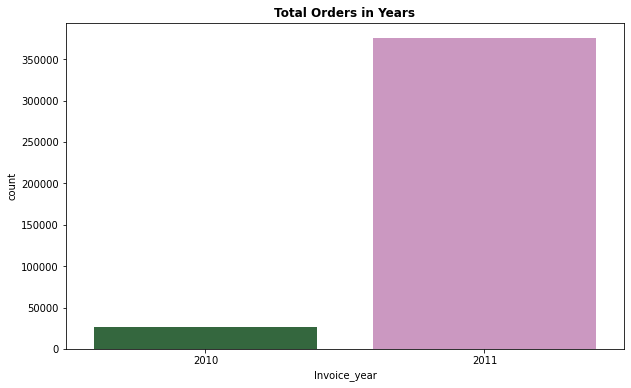

In [72]:
plt.figure(figsize= (10, 6))
sns.countplot(x= 'Invoice_year', data= retail_df, palette= 'cubehelix')
plt.title('Total Orders in Years', weight= 'bold')

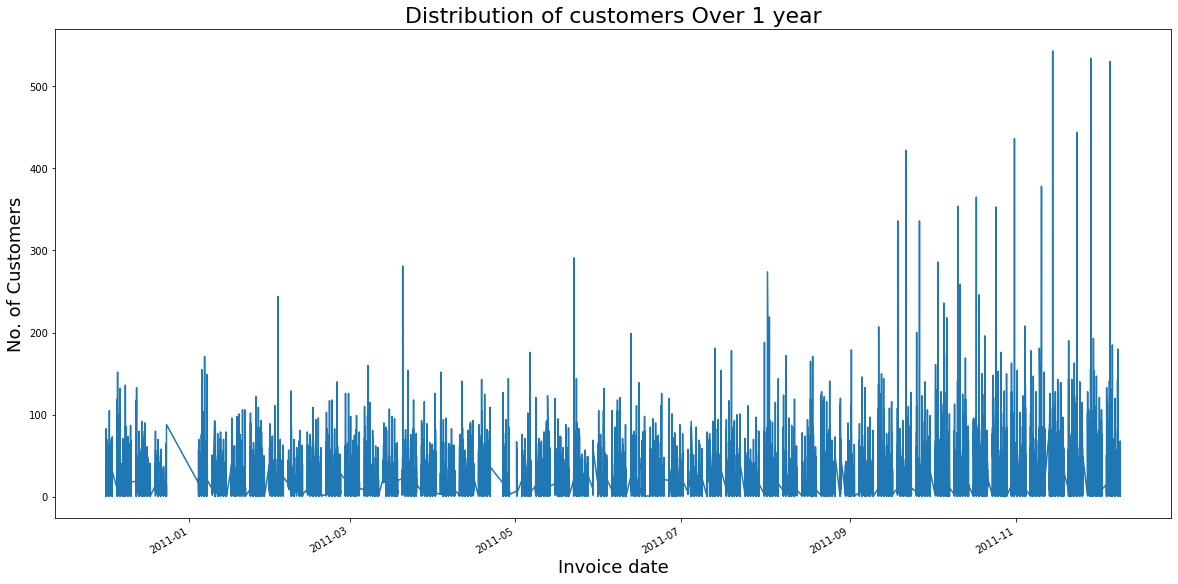

In [73]:
# customer distribution in 1 year time period
plt.figure(figsize=(20,10))
customer_distribution = retail_df.groupby('InvoiceDate').count()['CustomerID'].plot()
plt.title('Distribution of customers Over 1 year', size=22)
plt.xlabel('Invoice date', size=18)
plt.ylabel('No. of Customers', size=18)
plt.show()

**It can be easily concluded from the above graph that number of customers are increasing as we reaching towards the end of the year 2011.**

**September and November are getting highest purchasing order in comparison to January and March.**

Text(0.5, 1.0, 'CORRELATION MATRIX')

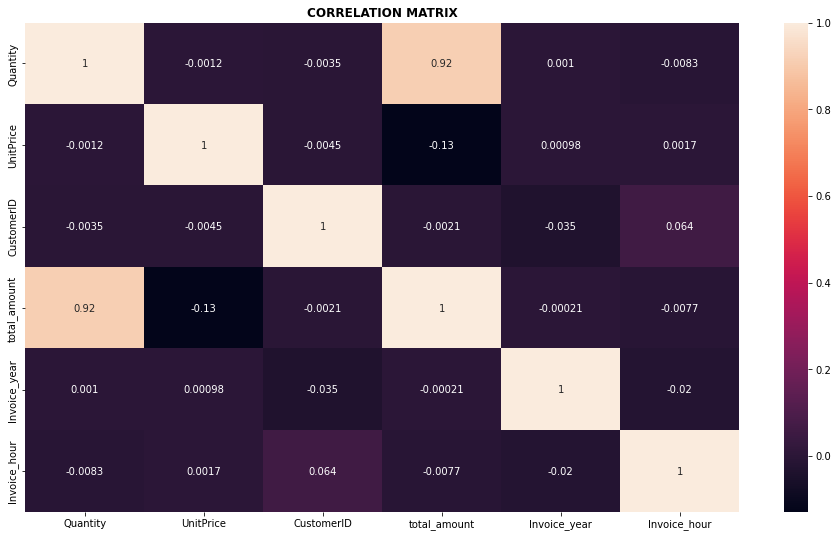

In [119]:
# correlation between various columns
plt.figure(figsize = (16,9))
sns.heatmap(retail_df.corr(), annot = True)
plt.title('CORRELATION MATRIX',weight= 'bold')